In [ ]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet

wordnet._pron = {}

nltk.download('punkt')
nltk.download('stopwords')

nltk.data.path.append("/path/to/your/nltk_data_directory")

def preprocess_text(text):
    tokens = word_tokenize(text.lower())
    tokens = [token for token in tokens if token.isalnum()]
    tokens = [token for token in tokens if token not in stopwords.words('english')]
    return tokens

def lemmatize_tokens(tokens):
    lemmatizer = WordNetLemmatizer()
    lemmas = [lemmatizer.lemmatize(token) for token in tokens]
    return lemmas

responses = [
    "Yes i have, the dropshipping is that the seller does not hold the inventory, ...",
    "Yes, I had. Dropshipping is a business model that allows you to sell products online ...",
    "Yes, I have ..."
    
]

# Apply preprocessing to all responses
processed_responses = [process_text(response) for response in responses]

# Basic frequency analysis of words
all_words = [word for response in processed_responses for word in response]
word_freq = nltk.FreqDist(all_words)

# Print the most common words
print(word_freq.most_common(10))


In [19]:
pip install spacy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.8/6.8 MB 21.5 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 107.0/107.0 kB 4.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 867.7/867.7 kB 20.8 MB/s eta 0:00:0000:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 48.9/48.9 kB 1.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 181.6/181.6 kB 7.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 374.5/374.5 kB 15.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 492.7/492.7 kB 17.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.9/45.9 kB 1.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 27.3 MB/s eta 0:00:0000:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.1/6.1 MB 29.9 MB/s eta 0:00:0000:0100:01
  Attempting uninstall: typing-extensions
    Found existing installation: typing_extensions 4.4.0
    Uninstalling typing_extensions-4.4.0:
      Successfully uninstal

In [ ]:
import spacy
nlp = spacy.load("en_core_web_sm")
!pip install spacy

def preprocess_text(text):
    doc = nlp(text)
    tokens = [token.lemma_ for token in doc if not token.is_stop and token.is_alpha]
    return tokens

responses = [
    "Yes i have, the dropshipping is that the seller does not hold the inventory, ...",
    "Yes, I had. Dropshipping is a business model that allows you to sell products online ...",
    "Yes, I have ..."
    
]

processed_responses = [process_text(response) for response in responses]

all_words = [word for response in processed_responses for word in response]
word_freq = nltk.FreqDist(all_words)

# Print the most common words
print(word_freq.most_common(10))

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/ololadefadipe_1/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/ololadefadipe_1/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Most common words:
dropshipping: 6
customer: 6
keep: 5
products: 5
stock: 5
instead: 5
seller: 4
directly: 4
business: 3
model: 3


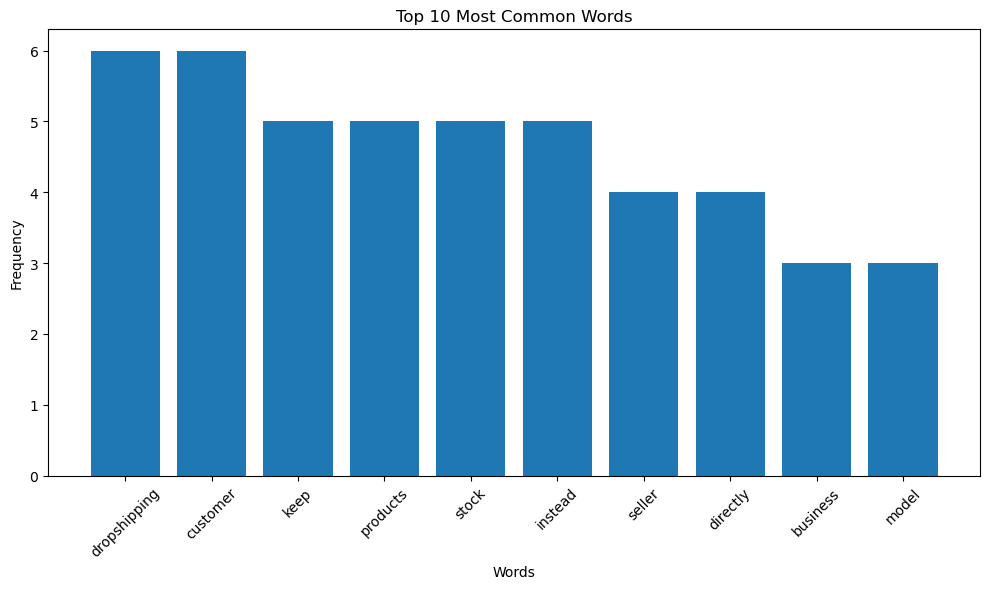

In [3]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from collections import Counter
import matplotlib.pyplot as plt

# Download NLTK resources if not already downloaded
nltk.download('punkt')
nltk.download('stopwords')

# Sample responses
responses = [
    "Yes, I have used dropshipping before. It's a business model where the seller doesn't keep the products in stock, but instead transfers the customer orders and shipment details to either the manufacturer or a wholesaler, who then ships the products directly to the customer.",
    "Dropshipping is a supply chain management method in which the retailer does not keep goods in stock but instead transfers the customer orders and shipment details to either the manufacturer, another retailer, or a wholesaler, who then ships the goods directly to the customer.",
    "No, I'm not familiar with dropshipping.",
    "Yes, I have heard about dropshipping. It's a business model where the seller doesn't keep the products in stock. Instead, when a seller makes a sale, they purchase the item from a third party and have it shipped directly to the customer.",
    "Dropshipping is a retail fulfillment method where a store doesn't keep the products it sells in stock. Instead, when a store sells a product, it purchases the item from a third party and has it shipped directly to the customer. As a result, the merchant never sees or handles the product.",
    "I haven't used dropshipping myself, but I know it's a business model where the seller doesn't keep the products in stock. Instead, they partner with a supplier who handles the inventory and shipping."
]

# Preprocess text
def preprocess_text(text):
    stop_words = set(stopwords.words('english'))
    words = word_tokenize(text.lower())
    words = [word for word in words if word.isalnum()]
    words = [word for word in words if word not in stop_words]
    return words

# Tokenize and preprocess all responses
processed_responses = [preprocess_text(response) for response in responses]

# Count word frequency
word_count = Counter()
for words in processed_responses:
    word_count.update(words)

# Print the most common words
print("Most common words:")
for word, count in word_count.most_common(10):
    print(f"{word}: {count}")

# Plot word frequency
plt.figure(figsize=(10, 6))
common_words = [word for word, count in word_count.most_common(10)]
common_counts = [count for word, count in word_count.most_common(10)]
plt.bar(common_words, common_counts)
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.title('Top 10 Most Common Words')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [3]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.stem import PorterStemmer
from collections import Counter

nltk.download('punkt')
nltk.download('stopwords')

responses = [
  "Yes, I have used dropshipping before. It's a business model where the seller doesn't keep the products in stock, but instead transfers the customer orders and shipment details to either the manufacturer or a wholesaler, who then ships the products directly to the customer.",
    "Dropshipping is a supply chain management method in which the retailer does not keep goods in stock but instead transfers the customer orders and shipment details to either the manufacturer, another retailer, or a wholesaler, who then ships the goods directly to the customer.",
    "No, I'm not familiar with dropshipping.",
    "Yes, I have heard about dropshipping. It's a business model where the seller doesn't keep the products in stock. Instead, when a seller makes a sale, they purchase the item from a third party and have it shipped directly to the customer.",
    "Dropshipping is a retail fulfillment method where a store doesn't keep the products it sells in stock. Instead, when a store sells a product, it purchases the item from a third party and has it shipped directly to the customer. As a result, the merchant never sees or handles the product.",
   
]

def preprocess_text(text):
    # Tokenize into sentences and then words
    sentences = sent_tokenize(text)
    words = []
    for sentence in sentences:
        words.extend(word_tokenize(sentence.lower()))

    # Remove stopwords and perform stemming
    stop_words = set(stopwords.words('english'))
    stemmer = PorterStemmer()
    words = [stemmer.stem(word) for word in words if word.isalnum() and word not in stop_words]

    return words

# Tokenize and preprocess all responses
processed_responses = [preprocess_text(response) for response in responses]

# Count word frequency
word_count = Counter()
for words in processed_responses:
    word_count.update(words)

# Define themes (manually identify themes based on the data)
themes = {
    "Theme 1": ["word1", "word2", ...],  # Replace with relevant keywords
    "Theme 2": ["word3", "word4", ...],  # Replace with relevant keywords
    # Define additional themes as needed
}


theme_counts = {theme: 0 for theme in themes}
for theme, keywords in themes.items():
    for keyword in keywords:
        theme_counts[theme] += word_count[keyword]

# Print theme counts
for theme, count in theme_counts.items():
    print(f"{theme}: {count}")


Theme 1: 0
Theme 2: 0


[nltk_data] Downloading package punkt to
[nltk_data]     /Users/ololadefadipe_1/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/ololadefadipe_1/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [4]:
import spacy
nlp = spacy.load("en_core_web_sm")
!pip install spacy

def preprocess_text(text):
    doc = nlp(text)
    tokens = [token.lemma_ for token in doc if not token.is_stop and token.is_alpha]
    return tokens
responses = [
    "Yes, I have used dropshipping before. It's a business model where the seller doesn't keep the products in stock, but instead transfers the customer orders and shipment details to either the manufacturer or a wholesaler, who then ships the products directly to the customer.",
    "Dropshipping is a supply chain management method in which the retailer does not keep goods in stock but instead transfers the customer orders and shipment details to either the manufacturer, another retailer, or a wholesaler, who then ships the goods directly to the customer.",
    "No, I'm not familiar with dropshipping.",
    "Yes, I have heard about dropshipping. It's a business model where the seller doesn't keep the products in stock. Instead, when a seller makes a sale, they purchase the item from a third party and have it shipped directly to the customer.",
    "Dropshipping is a retail fulfillment method where a store doesn't keep the products it sells in stock. Instead, when a store sells a product, it purchases the item from a third party and has it shipped directly to the customer. As a result, the merchant never sees or handles the product.",
    "I haven't used dropshipping myself, but I know it's a business model where the seller doesn't keep the products in stock. Instead, they partner with a supplier who handles the inventory and shipping."
]
processed_responses = [process_text(response) for response in responses]
all_words = [word for response in processed_responses for word in response]
word_freq = nltk.FreqDist(all_words)
print(word_freq.most_common(10))


2023-10-07 23:04:38.068622: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


OSError: [E050] Can't find model 'en_core_web_sm'. It doesn't seem to be a Python package or a valid path to a data directory.

Text(0.5, 1.0, 'Sentiment Analysis in Interview Responses')

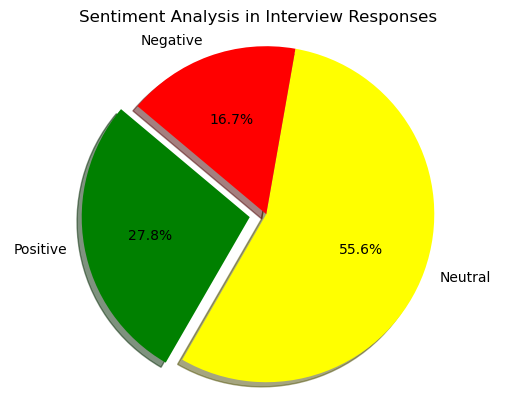

In [6]:
import pandas as pd
from textblob import TextBlob
import matplotlib.pyplot as plt
data = pd.read_csv("survey_data.csv")
positive_count = 0
neutral_count = 0
negative_count = 0
for index, row in data.iterrows():
    text = str(row['Have you ever experienced a data breach or privacy violation when shopping online? If so, how did you feel about it and how did the company respond?'])
    sentiment = TextBlob(text).sentiment.polarity
    if sentiment > 0:
        positive_count += 1
    elif sentiment < 0:
        negative_count += 1
    else:
        neutral_count += 1
labels = ['Positive', 'Neutral', 'Negative']
sizes = [positive_count, neutral_count, negative_count]
colors = ['green', 'yellow', 'red']
explode = (0.1, 0, 0)  
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)
plt.axis('equal')  
plt.title('Sentiment Analysis in Interview Responses')


Text(0.5, 1.0, 'Sentiment Analysis in Interview Responses')

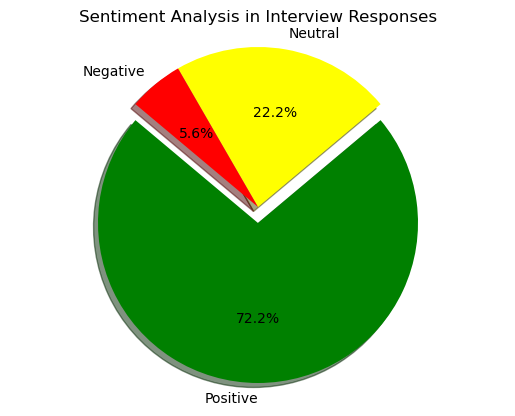

In [7]:
import pandas as pd
from textblob import TextBlob
import matplotlib.pyplot as plt
data = pd.read_csv("survey_data.csv")
positive_count = 0
neutral_count = 0
negative_count = 0
for index, row in data.iterrows():
    text = str(row['Would you be willing to pay more for a product if you knew that the dropshipper or online store was handling your data ethically? Why or why not?'])
    sentiment = TextBlob(text).sentiment.polarity
    if sentiment > 0:
        positive_count += 1
    elif sentiment < 0:
        negative_count += 1
    else:
        neutral_count += 1
labels = ['Positive', 'Neutral', 'Negative']
sizes = [positive_count, neutral_count, negative_count]
colors = ['green', 'yellow', 'red']
explode = (0.1, 0, 0)  # explode the 1st slice (Positive)
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Sentiment Analysis in Interview Responses')

In [8]:

import spacy
nlp = spacy.load("en_core_web_sm")
!pip install spacy

def preprocess_text(text):
    doc = nlp(text)
    tokens = [token.lemma_ for token in doc if not token.is_stop and token.is_alpha]
    return tokens

responses = [
    " When a store sells products without keeping them in stock, the seller buys the item from a third party and has it shipped directly to the customer. Yes, It is where people come together to buy goods from a different country. Cooperation to ease shipping and custom clearance.it is a product being bought online without any tangible inventory. No, I have not  No.  Yes i have, the dropshipping is that the seller does not hold the inventory, it is very popular in Vietnam and socila media platforms profit off dropshiping basicallly advertising fees. the chinese translated version is zhixiao. It is the same dropshipping business model where there is a mediator between customer and supplier. No never heard of it  No i have not, i only know that stores that send me things by couriers, i do not understand the logistics processA business wherein the middle man that takes products from sellers to consumers without necessarily owning inventory or physical goods. Is buying goods from online Is online demand and supply Yes, I had. Dropshipping is a business model that allows you to sell products online without having to own or operate the physical location where those products are stored and processedYes, I have not yetNo,Yes, Kol,koc for the brand is an example..."    
]
processed_responses = [process_text(response) for response in responses]

all_words = [word for response in processed_responses for word in response]
word_freq = nltk.FreqDist(all_words)
print(word_freq.most_common(10))

OSError: [E050] Can't find model 'en_core_web_sm'. It doesn't seem to be a Python package or a valid path to a data directory.

Most common words:
dropshipping: 6
customer: 6
keep: 5
products: 5
stock: 5
instead: 5
seller: 4
directly: 4
business: 3
model: 3


[nltk_data] Downloading package punkt to
[nltk_data]     /Users/ololadefadipe_1/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/ololadefadipe_1/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


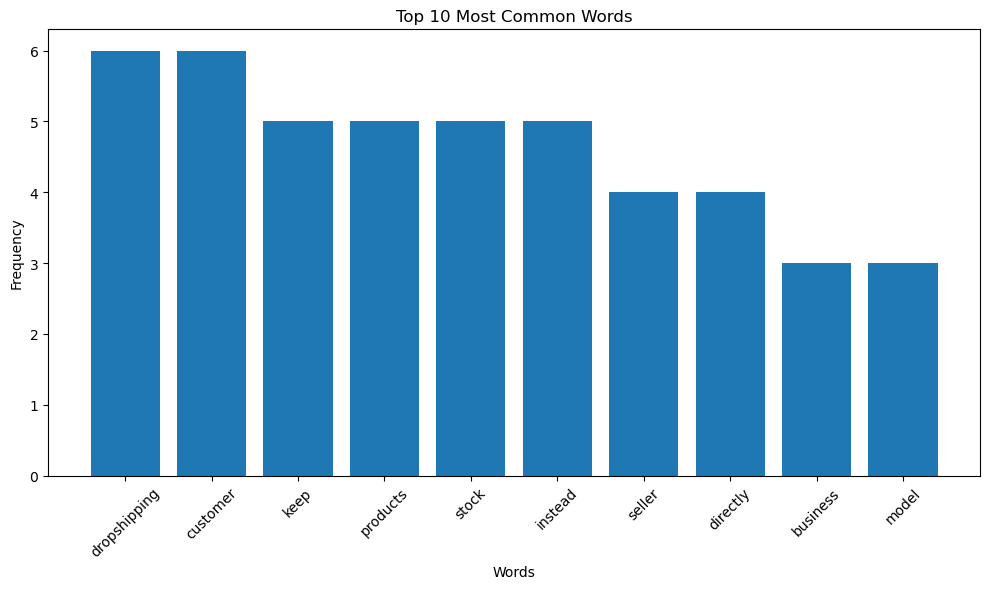

In [2]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from collections import Counter
import matplotlib.pyplot as plt
nltk.download('punkt')
nltk.download('stopwords')
responses = [
    "Yes, I have used dropshipping before. It's a business model where the seller doesn't keep the products in stock, but instead transfers the customer orders and shipment details to either the manufacturer or a wholesaler, who then ships the products directly to the customer.",
    "Dropshipping is a supply chain management method in which the retailer does not keep goods in stock but instead transfers the customer orders and shipment details to either the manufacturer, another retailer, or a wholesaler, who then ships the goods directly to the customer.",
    "No, I'm not familiar with dropshipping.",
    "Yes, I have heard about dropshipping. It's a business model where the seller doesn't keep the products in stock. Instead, when a seller makes a sale, they purchase the item from a third party and have it shipped directly to the customer.",
    "Dropshipping is a retail fulfillment method where a store doesn't keep the products it sells in stock. Instead, when a store sells a product, it purchases the item from a third party and has it shipped directly to the customer. As a result, the merchant never sees or handles the product.",
    "I haven't used dropshipping myself, but I know it's a business model where the seller doesn't keep the products in stock. Instead, they partner with a supplier who handles the inventory and shipping."
]
def preprocess_text(text):
    stop_words = set(stopwords.words('english'))
    words = word_tokenize(text.lower())
    words = [word for word in words if word.isalnum()]
    words = [word for word in words if word not in stop_words]
    return words
processed_responses = [preprocess_text(response) for response in responses]

word_count = Counter()
for words in processed_responses:
    word_count.update(words)

print("Most common words:")
for word, count in word_count.most_common(10):
    print(f"{word}: {count}")
plt.figure(figsize=(10, 6))
common_words = [word for word, count in word_count.most_common(10)]
common_counts = [count for word, count in word_count.most_common(10)]
plt.bar(common_words, common_counts)
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.title('Top 10 Most Common Words')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



In [3]:
import keras
from keras.models import Sequential
from keras.layers import Dense
import tensorflow as tf

 

inputs = tf.keras.Input(shape=(3,))
x = tf.keras.layers.Dense(4, activation=tf.nn.sigmoid)(inputs)
outputs = tf.keras.layers.Dense(1)(x)
model = tf.keras.Model(inputs=inputs, outputs=outputs)
model.compile(optimizer = 'adam',loss = 'mse' )
model.summary()

2023-10-10 11:29:12.203490: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 3)]               0         
                                                                 
 dense (Dense)               (None, 4)                 16        
                                                                 
 dense_1 (Dense)             (None, 1)                 5         
                                                                 
Total params: 21
Trainable params: 21
Non-trainable params: 0
_________________________________________________________________


2023-10-10 11:30:56.638881: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
